### Measuring eccentricity at reference frequencies

In [13]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load a PN waveform

In [14]:
lal_kwargs = {"approximant": "EccentricTD",
                  "q": 1.0,
                  "chi1": [0.0, 0.0, 0.0],
                  "chi2": [0.0, 0.0, 0.0],
                  "Momega0": 0.01,
                  "ecc": 0.1,
                  "mean_ano": 0,
                  "include_zero_ecc": True}
dataDict = load_waveform(**lal_kwargs)

### measure eccentricity at a single fref 

In [15]:
from measureEccentricity import eccDefinition

In [16]:
eccDef = eccDefinition.eccDefinition(dataDict)
omega_averaging_methods = list(eccDef.get_availabe_omega_averaging_methods().keys())

In [17]:
omega_averaging_methods

['average_between_extrema', 'orbital_average_at_periastron', 'omega22_zeroecc']

In [18]:
fref_in = 0.03
for averaging_method in omega_averaging_methods:
    fref_out, ecc, mean_ano, eccMethod = measure_eccentricity(
        fref_in=fref_in,
        dataDict=dataDict,
        method="ResidualAmplitude", 
        return_ecc_method=True,
        extra_kwargs={"debug": False, "omega_averaging_method": averaging_method})
    print(f"Averaging method = {averaging_method}, f_ref = {fref_out}, ecc = {ecc}, mean anomaly = {mean_ano}")

Averaging method = average_between_extrema, f_ref = 0.03, ecc = 0.08038266012258283, mean anomaly = 6.0765170522356735
Averaging method = orbital_average_at_periastron, f_ref = 0.03, ecc = 0.07918410278276615, mean anomaly = 2.8317198562498533
Averaging method = omega22_zeroecc, f_ref = 0.03, ecc = 0.07958749072549064, mean anomaly = 1.8178020299836744


### measure eccentricity at a reference frequency array

In [19]:
fref_in = np.arange(0.01, 0.1, 0.001)

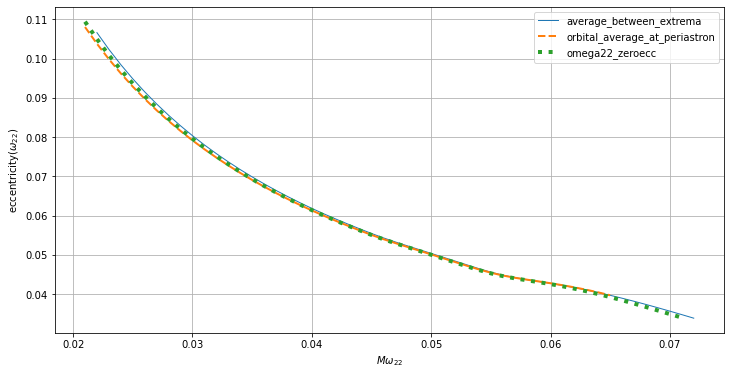

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
lstyles = ["-", "--", ":"]
lwidths = [1, 2, 4]
for idx, averaging_method in enumerate(omega_averaging_methods):
    fref_out, ecc, mean_ano, eccMethod = measure_eccentricity(
        fref_in=fref_in,
        dataDict=dataDict,
        method="ResidualAmplitude", 
        return_ecc_method=True,
        extra_kwargs={"debug": False, "omega_averaging_method": averaging_method})
    ax.plot(fref_out, ecc, ls=lstyles[idx], lw=lwidths[idx], label=f"{averaging_method}")
ax.legend()
ax.set_xlabel(r"$M\omega_{22}$")
ax.set_ylabel("eccentricity($\omega_{22}$)")
ax.grid()